# Platzi courses analysis

In [1]:
#  Required libraries
import pandas as pd
import os
import seaborn as sns
import numpy as np

## 1. Get and collect all courses
The courses are in csv files per study path or career and we must read them and put them together in a single dataframe. <br/><br/>
_To download the csv files, please read the following repository:_

In [2]:
#  This peace of code generates 2 dataframes: general_info , detailed_info

files = [f for f in os.listdir('./schools')]
general_info = pd.DataFrame()
detailed_info = pd.DataFrame()
for file in files:
    try:
        excel_f = pd.ExcelFile('schools/'+file)
        df1 = pd.read_excel(excel_f, 'General_Info')
        df2 = pd.read_excel(excel_f, 'Detailed_Courses')
        try:
            df1.drop(['Unnamed: 0'], axis=1, inplace = True)
            df2.drop(['Unnamed: 0'], axis=1, inplace = True)
        except:
            pass
        
        general_info = pd.concat([general_info, df1])
        detailed_info = pd.concat([detailed_info, df2])
    except:
        pass
#  The detailed_info has a row with a total value, that row should be deleted
indexNames = detailed_info[detailed_info['Course'] == 'TOTAL' ].index
detailed_info.drop(indexNames , inplace=True)

#  Drop duplicates rows
general_info = general_info.drop_duplicates()
detailed_info = detailed_info.drop_duplicates()

print('done')

done


In [3]:
general_info.head()

,Route_Name,Title,Level,Course,Link
0,Administración de Servidores y DevOps,Conoce la terminal y diferentes proveedores de...,Básico,Curso de Introducción a la Terminal y Línea de...,https://platzi.com/cursos/terminal/
1,Administración de Servidores y DevOps,Conoce la terminal y diferentes proveedores de...,Básico,Fundamentos de Ingeniería de Software,https://platzi.com/cursos/ingenieria/
2,Administración de Servidores y DevOps,Conoce la terminal y diferentes proveedores de...,Básico,Curso de Administración de Servidores Linux,https://platzi.com/cursos/linux/
3,Administración de Servidores y DevOps,Conoce la terminal y diferentes proveedores de...,Básico,Curso de Introducción al Despliegue de Aplicac...,https://platzi.com/cursos/despliegue-apps/
4,Administración de Servidores y DevOps,Conoce la terminal y diferentes proveedores de...,Básico,Audiocurso de Fundamentos de Arquitectura de A...,https://platzi.com/cursos/arquitectura-alta-co...


In [4]:
detailed_info.head()

,Course,Teacher,Hours of study,Hours of practice,Quantity of classes,Avg min/class,Finished,Link
0,Curso de Introducción a la Terminal y Línea de...,Enrique Devars,3,8,21,8.57,6799,https://platzi.com/cursos/terminal/
1,Fundamentos de Ingeniería de Software,Freddy Vega,5,10,32,9.38,11875,https://platzi.com/cursos/ingenieria/
2,Curso de Administración de Servidores Linux,Jhon Edison Castro,5,18,46,6.52,1963,https://platzi.com/cursos/linux/
3,Curso de Introducción al Despliegue de Aplicac...,Santiago Bernal,1,10,18,3.33,777,https://platzi.com/cursos/despliegue-apps/
4,Audiocurso de Fundamentos de Arquitectura de A...,Pablo Fredrikson,1,14,18,3.33,281,https://platzi.com/cursos/arquitectura-alta-co...


##  2. Now, let's answer some questions.
1. [How many careers and courses does Platzi have?](#2.1.-How-many-careers-and-courses-does-Platzi-have?)
1. [Who are the top 10 teacher with more courses?](#2.2.-Who-are-the-top-10-teacher-with-more-courses?)
1. [What courses have been the most completed?](#2.3.-What-courses-have-been-the-most-completed?)
1. [Who are the top 10 teacher with more finished?](#2.4.-Who-are-the-top-10-teacher-with-more-finished?)
1. [Relation between students and courses launched per teacher.](#2.5.-Relation-between-students-and-courses-launched-per-teacher.)

### 2.1. How many careers and courses does Platzi have?

In [5]:
#  Quantity of courses per career
count_career = pd.DataFrame(general_info['Route_Name'].value_counts())
count_career.head(10)

,Route_Name
Escuela de Desarrollo Web,107
Escuela de Marketing Digital,76
Escuela de Habilidades Blandas,68
Machine Learning Engineer,61
Escuela de Business Management,59
Escuela de Programación y Desarrollo de Software,58
Platzi English Academy,58
Escuela de Startups,58
Data Engineer,45
Escuela de Producción Audiovisual,43


In [6]:
#  Total careers
print('Platzi has', len(count_career['Route_Name']), 'careers.')

#  Total courses
print('Platzi has', len(detailed_info['Course']), 'courses.')

Platzi has 61 careers.
Platzi has 487 courses.


__Conclusion:__ The career of Web Desing has 107 courses, that's a big amount of courses compared to Digital Marketing that only has 76 courses. But from Digital Marketing to Audiovisual Production, the difference if less.

***

### 2.2. Who are the top 10 teacher with more courses?

In [7]:
#  Quantity of courses per teacher

t_c = pd.DataFrame(detailed_info['Teacher'].value_counts())
top_teachers = pd.DataFrame(list(zip( list(t_c['Teacher'].index), list(t_c['Teacher']) )), columns = ['Teacher','Count'])
top_teachers = top_teachers.sort_values('Count',ascending=False)
top10_teachers = top_teachers.head(10)
top10_teachers

,Teacher,Count
0,Nicolas Molina,14
1,Oscar Barajas Tavares,12
2,Ricardo Celis,11
3,Jonathan Alvarez,9
4,Anahí Salgado Díaz de la Vega,7
5,Juan Gabriel Gomila,6
6,Diana Reyes,6
7,Freddy Vega,6
11,Angela Ocando,5
12,Jhon Carvajal,5


In [8]:
#  Quantity of teachers

print('Platzi has had', len(top_teachers['Teacher']), 'teachers until now (14-12-2021).')

Platzi has had 304 teachers until now (14-12-2021).


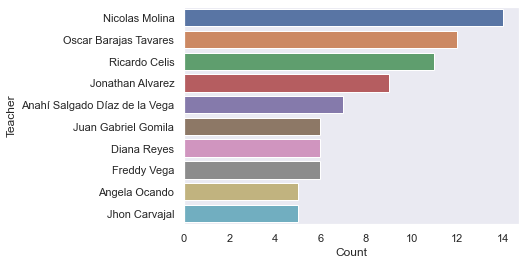

In [9]:
#  Creating a chart

sns.set_theme(style="dark")
ax = sns.barplot(x="Count", y="Teacher", data=top10_teachers)

__Conclusion:__ Nicolas Molina has 14 courses launched, the next teacher is Oscar Barajas T. with 12 courses launched. There is a minimal difference between the top 10 teachers.

***

### 2.3. What courses have been the most completed?

In [10]:
more_finished = detailed_info.sort_values('Finished', ascending=False)
more_finished = more_finished[['Course', 'Teacher','Finished']]
more10_finished = more_finished.head(10)
more10_finished

,Course,Teacher,Finished
1,Curso Gratis de Programación Básica,Freddy Vega,23325
2,Curso de Inglés para Principiantes,Gina Pedraza,18003
0,Curso de Estrategias para Aprender en Línea Ef...,Anahí Salgado Díaz de la Vega,17845
0,Curso de Estrategias para Aprender Inglés Online,Andrea Velásquez,17454
2,Curso Profesional de Git y GitHub,Freddy Vega,14868
34,Curso Gratis de Marca Personal,Freddy Vega,14520
0,Curso de Prework: Configuración de Entorno de ...,Ricardo Celis,13882
3,Curso Básico de Python,Facundo García Martoni,13836
2,Curso Básico de JavaScript,Diego De Granda,13224
1,Curso de Gestión Efectiva del Tiempo,Beatriz Ibañez,13042


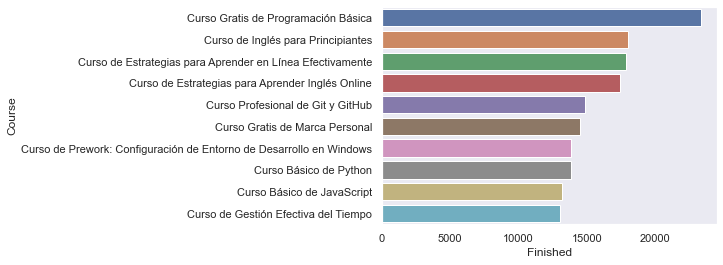

In [11]:
#  Creating a chart

sns.set_theme(style="dark")
ax = sns.barplot(x="Finished", y="Course", data=more10_finished)

__Conclusion:__ As you can see the top 10 courses most finished are basic courses.

***

### 2.4. Who are the top 10 teacher with more finished?

In [29]:
#  And what about the teachers with more courses finished?
uniq_teach = list(set(list(more_finished['Teacher'])))
more_finished_x_teacher = pd.DataFrame()
more_finished_x_teacher['Teacher'] = uniq_teach

count_by_teach = []
courses_by_teach = []
for teacher in more_finished_x_teacher['Teacher']:
    temp_sum = more_finished.loc[more_finished['Teacher'] == teacher, 'Finished'].sum()
    temp_count = list(more_finished['Teacher']).count(teacher)
    count_by_teach.append(temp_sum)
    courses_by_teach.append(temp_count)
    
more_finished_x_teacher['Finished'] = count_by_teach
more_finished_x_teacher['Courses Qnty'] = courses_by_teach

more_finished_x_teacher = more_finished_x_teacher.sort_values('Finished',ascending=False)
more_finished_x_teacher.head(10)

#  There are some courses that have 0 finished, that's why those courses are not available yet.

,Teacher,Finished,Courses Qnty
277,Freddy Vega,70735,6
1,Ricardo Celis,35626,11
299,Anahí Salgado Díaz de la Vega,35167,7
91,Diego De Granda,27786,5
228,Oscar Barajas Tavares,22676,12
44,Facundo García Martoni,20454,5
302,Gina Pedraza,19240,2
214,Andrea Velásquez,17454,1
208,Beatriz Ibañez,16186,2
123,Angela Ocando,11018,5


In [30]:
#  Also let's analyze the teacher with less finished.
'''
Before doing this study we have to delete the courses with 0 finished because those haven't been launched yet.
'''
indexNames = more_finished_x_teacher[more_finished_x_teacher['Finished'] == 0 ].index
more_finished_x_teacher = more_finished_x_teacher.drop(indexNames)
more_finished_x_teacher.tail(10)

,Teacher,Finished,Courses Qnty
66,Vanessa Amaya,12,1
265,Camilo Gómez,11,1
63,Pablo Pérez,8,1
57,Luis Antonio Ruvalcaba Sánchez,7,1
20,Ravee Lakhmani,7,1
83,Sthefanni Beltrán,6,1
120,Nicolas Galagovsky,5,1
169,Adonaí Vera,5,1
42,Gerson Perdomo,1,1
172,Laura Rojas Aponte,1,1


__Conclusion:__ You can see that Freddy Vega has 70,735 students who have finished their courses with 6 courses launched.<br>
But Ricardo Celis, with 11 courses launched, has almost half of the students who have finished their courses.<br>
Andrea Velásquez seems to be an excellent teacher because with only 1 course launched has more completed than Angela O. with 5 courses launched.

***

### 2.5. Relation between students and courses launched per teacher.

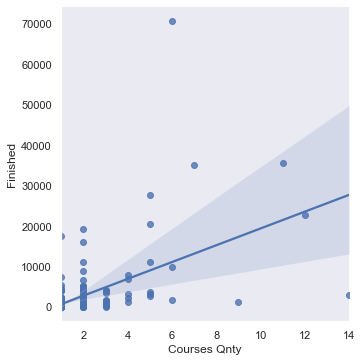

In [31]:
ax = sns.lmplot(x='Courses Qnty', y='Finished', data=more_finished_x_teacher_w_c)

In [24]:
#  Let's calculate the correlation coefficient
corr_array = np.corrcoef(more_finished_x_teacher_w_c['Courses Qnty'], more_finished_x_teacher_w_c['Finished'])
corr_array[0][1]

0.542665853327476

__Conclusion:__  The correlation coefficient is positive, that means that the more a teacher launch a course, the morefinished he will have.